## Monte Carlo simulation for NVT Ensemble

Reference: Computer Simulation of Liquid, 2017

Import packages

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from tqdm import tqdm
from itertools import product

import sys
import time

from MonteCarlo import MonteCarlo
from PotentialType import PotentialType

In [2]:
import build.MonteCarlo as MC

### Test the equivalence of the C++ and Python version

In [4]:
box = np.array( [10, 10, 10] )
vol = np.prod( box )
num = 200
rho = float(num) / vol

rCut  = 2.5
drMax = 0.25
cells = np.ceil( float( num  / np.prod( box ) )**(1./3.) * box )
cells = cells.astype(np.int64)

temperature = 2.

r = np.zeros([num, 3])
r = MonteCarlo.initCoords(r, cells)

# Initial energy and check the particle position
total = MonteCarlo.potential ( box, rCut, r )
assert not total.ovr, "Overlap in the initial configuration"

mc = MC.MonteCarlo(num, 3, temperature, rCut, True)
mc.SetBox( box )

# Initial energy and check the particle position, CPP veraion
mc.SetPosition( r )
total1 = mc.GetPotential()

print( "CPP total potential: " + str(total1["pot"]))
print( "Py  total potential: " + str(total.pot))
print( "CPP total Virial: " + str(total1["vir"]))
print( "Py  total Virial: " + str(total.vir))

results = mc.MoveParticles( drMax )
total2  = PotentialType ( pot=results["pot"], vir=results["vir"], ovr= False ) + total

total1 = mc.GetPotential()

r1    = mc.GetPosition()
total = MonteCarlo.potential ( box, rCut, r1 )

print("********* after displacement particle *********")
print( "CPP total potential: " + str(total1["pot"]))
print( "CPP total potential 2: " + str(total2.pot))
print( "Py  total potential: " + str(total.pot))
print( "CPP total Virial: " + str(total1["vir"]))
print( "CPP total Virial 2: " + str(total2.vir))
print( "Py  total Virial: " + str(total.vir))

CPP total potential: -128.72578914791444sc = 4

Py  total potential: -128.72578740940781
CPP total Virial: -247.09771281446461
Py  total Virial: -247.09770963763188
********* after displacement particle *********
CPP total potential: -197.97349645403435
CPP total potential 2: -197.97349471552678
Py  total potential: -197.97350474059527
CPP total Virial: -1.895071310409467
CPP total Virial 2: -1.8950681335731474
Py  total Virial: -1.8951211694404688


In [ ]:
'''
chemPex = np.mean( np.array(pots[1000:]))
chemPex = - np.log( chemPex )
print( "Excess Chemical Potential: " + str(chemPex) )
chemP = np.log( 0.4 ) + chemPex
print( "Chemical Potential: " + str(chemP) )
'''

### Test the energy, pressure and chemical potential

In [5]:
system = {}
system["size"]           = np.array( [10, 10, 10] )
system["temperature"]    = 2.
system["rCut"]           = 2.5
system["drMax"]          = 0.25
system["Version"]        = "CPP"
system["isNeighborList"] = True
system["initStep"]       = 1000

In [6]:
testDensity = np.arange(100, 900, 100)

pressures_py, moveRatios_py, totalEnergy_py, cp_py = [], [], [], []
pressures_cpp, moveRatios_cpp, totalEnergy_cpp, cp_cpp, chemP_cpp = [], [], [], [], []

potT1 = []
potT2 = []

for i in testDensity:
    system["numberOfParticles"] = i
    MC = MonteCarlo(system)
    p,  m,  t,  pot,  _ = MC.MC_NVT()
    p1, m1, t1, pot1, mu2 = MC.MC_NVT_CPP(nBlock=10, nStep=1000)

    pressures_py.append(p)
    moveRatios_py.append(m)
    totalEnergy_py.append(t)
    cp_py.append(pot)

    pressures_cpp.append(p1)
    moveRatios_cpp.append(m1)
    totalEnergy_cpp.append(t1)
    cp_cpp.append(pot1)

    chemP_cpp.append(mu2)


pressure delta: -0.00533969013773771
Pressure lrc: -0.010694021158401335
Internal Energy LRC: -0.05354331020663623
sc = 4


 10%|█         | 1/10 [00:04<00:36,  4.04s/it]/Users/cz/code/MC_for_beginner/MonteCarlo.py:131: RuntimeWarning: divide by zero encountered in divide
  sr2      = np.where(in_range, 1./rij2, 0.)
100%|██████████| 10/10 [00:39<00:00,  3.90s/it]


cells: 5 5 5
Running Time: 2.7952558994293213 s
pressure delta: -0.02135876055095084
Pressure lrc: -0.04277608463360534
Internal Energy LRC: -0.10708662041327247
Initial Start
Initial Done.
sc = 4


100%|██████████| 10/10 [01:30<00:00,  9.06s/it]


cells: 6 6 6
Running Time: 7.1583781242370605 s
pressure delta: -0.04805721123963938
Pressure lrc: -0.09624619042561199
Internal Energy LRC: -0.16062993061990868
Initial Start
Initial Done.
sc = 4


100%|██████████| 10/10 [02:32<00:00, 15.27s/it]


cells: 7 7 7
Initial Start
Initial Done.
Running Time: 13.115062713623047 s
pressure delta: -0.08543504220380337
Pressure lrc: -0.17110433853442136
Internal Energy LRC: -0.21417324082654493
sc = 4


100%|██████████| 10/10 [03:42<00:00, 22.22s/it]


cells: 8 8 8
Initial Start
Initial Done.
Running Time: 20.61227321624756 s
pressure delta: -0.13349225344344273
Pressure lrc: -0.2673505289600333
Internal Energy LRC: -0.26771655103318115
sc = 4


100%|██████████| 10/10 [04:51<00:00, 29.19s/it]


cells: 8 8 8
Running Time: 28.45425796508789 s
pressure delta: -0.19222884495855752
Pressure lrc: -0.38498476170244794
Internal Energy LRC: -0.32125986123981737
Initial Start
Initial Done.
sc = 4


100%|██████████| 10/10 [06:25<00:00, 38.52s/it]


cells: 9 9 9
Running Time: 39.170320987701416 s
pressure delta: -0.26164481674914775
Pressure lrc: -0.5240070367616652
Internal Energy LRC: -0.3748031714464536
Initial Start
Initial Done.
sc = 4


100%|██████████| 10/10 [08:23<00:00, 50.36s/it]


cells: 9 9 9
Initial Start
Initial Done.
Running Time: 54.206470251083374 s
pressure delta: -0.34174016881521346
Pressure lrc: -0.6844173541376855
Internal Energy LRC: -0.42834648165308986
sc = 4


100%|██████████| 10/10 [10:10<00:00, 61.09s/it]


cells: 10 10 10
Initial Start
Initial Done.
Running Time: 66.81510305404663 s


Calculate and test the system pressure

In [7]:
presCPP = [np.mean( np.array(i) ) for i in pressures_cpp]
presPY  = [np.mean( np.array(i[2000:]) ) for i in pressures_py]

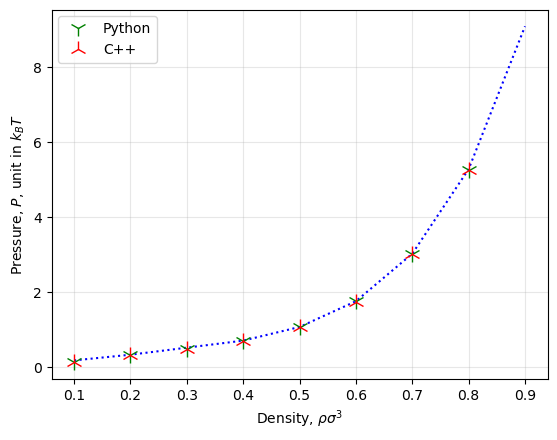

In [8]:
xx2 = np.arange(0.1, 0.9, 0.1)

# Data from MBWR paper 89 
xx1 = np.array([0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
yy1 = np.array([0.1777, 0.3290, 0.705, 1.069, 1.756, 3.024, 5.28, 9.09])

plt.plot( xx1, yy1, color="b", linestyle=":", marker="" )
plt.plot( xx2, presPY, color="g", linestyle="", marker="1", markersize=12, label="Python" )
plt.plot( xx2, presCPP, color="r", linestyle="", marker="2", markersize=12, label="C++" )

plt.xlabel("Density, " + r"$\rho \sigma^3$")
plt.ylabel("Pressure, " + r"$P$, unit in $k_B T$")

plt.grid(alpha = 0.3)

plt.legend()
plt.show()


Calculate and test the total energy

In [9]:
totU = [
    [0.1, -0.669], [0.2, -1.308], [0.3, -1.922], [0.4, -2.539], [0.5, -3.149],
    [0.6, -3.747], [0.7, -4.3], [0.8, -4.752], [0.9, -5.025] 
    ]

totU = np.array( totU )

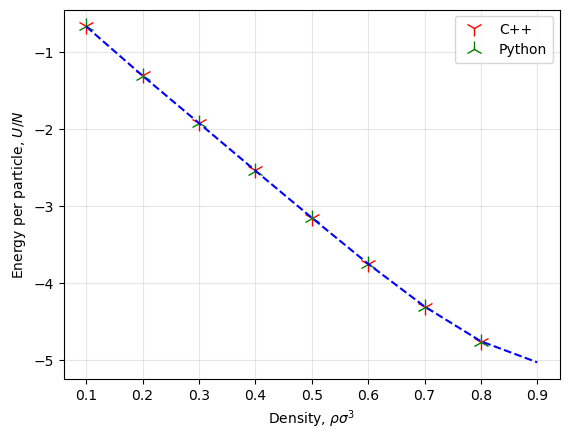

In [11]:
#np.mean( np.array(total[1000:] / 200) )
#total = np.array( [i.pot for i in totalEnergy] )

num = np.arange(100, 900, 100)
up, uc  = [], []

for i, t in enumerate(totalEnergy_cpp):
    #total = t1 #np.array( [j.pot for j in t] )
    #u1 = np.mean( np.array(t[1000:]) ) / num[i]
    u1 = np.mean( np.array(t) ) / num[i]
    u2 = np.mean( np.array(totalEnergy_py[i][1000:]) ) / num[i]
    uc.append(u1)
    up.append(u2)

plt.plot( xx2, np.array( uc ), color="r", linestyle="", marker="1", markersize=12, label="C++" )
plt.plot( xx2, np.array( up ), color="g", linestyle="", marker="2", markersize=12, label="Python" )
plt.plot( totU[:,0], totU[:,1], color="b", linestyle="--", marker="")

plt.xlabel("Density, " + r"$\rho \sigma^3$")
plt.ylabel("Energy per particle, " + r"$U/N$")

plt.grid(alpha = 0.3)

plt.legend()
plt.show()

Calculate and test the chemical potential

In [48]:
testChemPex = np.loadtxt("chemPex.dat", skiprows=1)

# data from Frenkel's book

In [14]:
import MBWR_EOS

test = {"temperature": 2.0, "sigma": 1., "component":1, "epsilon":1., "wave":1.0}
CP = []

xx2 = np.arange( 0.1, 0.9, 0.1 )
mbwr = MBWR_EOS.MBWR_EOS(test)
for i in xx2:
    mbwr.rho = i
    chemP    = mbwr.exChemicalPotential()
    CP.append(chemP[0][0])

CP = np.array( CP )
print(CP)


[-0.22695933 -0.38854561 -0.47184415 -0.44893499 -0.26556246  0.17444464
  1.00202214  2.36939012]


In [15]:
# data from CMC result of other program
yy = np.array([ -0.124232,  -0.186052, -0.172991, -0.0584114, 0.244226, 0.771789, 1.7077 ])
xx = np.array([ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ])

In [16]:
def uTail ( rho, rCut ):
    tail = (8./3.) * np.pi * rho * ( (1./3.) * (1./rCut)**9 - (1./rCut)**3 )
    return tail

tCPex_PY = [ np.mean( np.array( i[2000:] ) ) for i in cp_py ]
tCPex_PY = - np.log( tCPex_PY )

tCPex_CPP = [ np.mean( np.array( i ) ) for i in cp_cpp ]
tCPex_CPP = - np.log( tCPex_CPP )

xx2 = np.arange( 0.1, 0.9, 0.1 )
uts = []
for i in xx2:
    ut = uTail ( i, 2.5 )
    uts.append(ut)

tCPex_PY  = tCPex_PY  + (1./2.) * 2.0 * np.array( uts ) # unit: 1
tCPex_CPP = tCPex_CPP + (1./2.) * 2.0 * np.array( uts ) # unit: 1

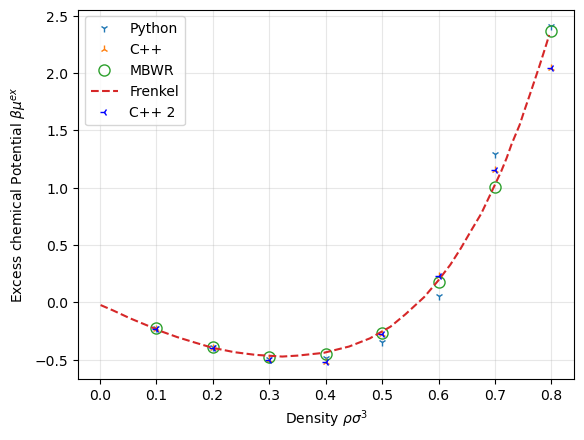

In [49]:
xx2 = np.arange(0.1, 0.9, 0.1)
plt.plot( xx2, tCPex_PY,  marker='1', linestyle="", label="Python" )
plt.plot( xx2, tCPex_CPP, marker='2', linestyle="", label="C++" )
plt.plot( xx2, CP, 'o', markerfacecolor='none', markersize=8, linestyle="" , markeredgewidth=1, label="MBWR" )
plt.plot( testChemPex[:,0], testChemPex[:,1]/2., "--", label="Frenkel") # 2 is the temperature
plt.xlabel("Density " + r"$\rho \sigma^3$")
plt.ylabel("Excess chemical Potential " + r"$\beta\mu^{ex}$")

#plt.plot( xx, yy + 2*np.array(uts[:7]), "*", linestyle="", label="CMC" ) # data from other program
plt.plot( xx2, chemP_cpp, marker="3", color="b", linestyle="", label="C++ 2" )

plt.grid(alpha = 0.3)
plt.legend()
plt.show()

### Calculate the g(r)

In [ ]:
g_data = np.loadtxt("gr.dat", skiprows=1)
# data from Dean Frenkel Understanding molecular simulation, e82 Figure N.6

In [21]:
system = {}

system["numberOfParticles"] = 512
system["density"]           = 0.8442
system["temperature"]       = 1.5043
system["rCut"]              = 2.5
system["cells"]             = np.array([8, 8, 8])
system["drMax"]             = 0.25

system["Version"]           = "CPP"
# system["isNeighborList"]    = False
system["isNeighborList"]    = True

system["InitState"]         = 1000

# system["numberOfBlocks"]    = 10
# system["numberOfSteps"]     = 1000

# system["Filename"] = "trajectory.xyz"

system["size"] = system["cells"] / ( system["density"] ) ** (1./3.)
print( system["size"] )
print( np.prod(system["cells"]) / np.prod( system["size"] ) )

[8.46463439 8.46463439 8.46463439]
0.8442000000000002


In [22]:
MC = MonteCarlo(system)
pressure, moveRatio, totalEnergy, pots, _ = MC.MC_NVT_CPP( nBlock=10, nStep=1000 )

pressure delta: -0.38054564069336366
Pressure lrc: -0.7621346985194898
Internal Energy LRC: -0.45201262476442317
sc = 3
cells: 8 8 8
Initial Start
Initial Done.
Running Time: 49.81721901893616 s


In [23]:
positions = MonteCarlo.readXYZTrajectory("trajectory.xyz")
positions.shape

(500, 512, 3)

In [24]:
rMid, g = MonteCarlo.rdf( positions[:], system["size"][0], 512, dr=0.02 )

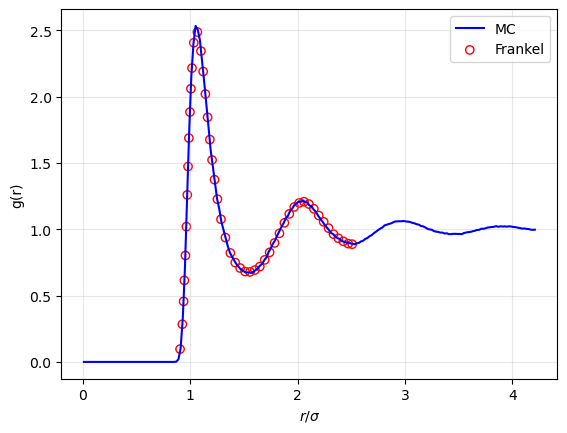

In [35]:
plt.plot( rMid, g, color="b", label="MC" )
plt.scatter( g_data[:,0], g_data[:,1], marker="o", edgecolors="r", color='none', label = "Frankel" )

plt.xlabel(r"$r/\sigma$")
plt.ylabel("g(r)")

plt.grid(alpha = 0.3)
plt.legend()
plt.show()

In [ ]:
"""
1 2 3 4 5 6
6 1 2 3 4 5 (1, 6) (1, 2)
5 6 1 2 3 4 (1, 5) (1, 3)
4 5 6 1 2 3 (1, 4) (1, 4)
"""

"""
1 2 3 4 5
5 1 2 3 4 (1, 5) (1, 2)
4 5 1 2 3 (1, 4) (1, 3)
"""

### Test the simulation time

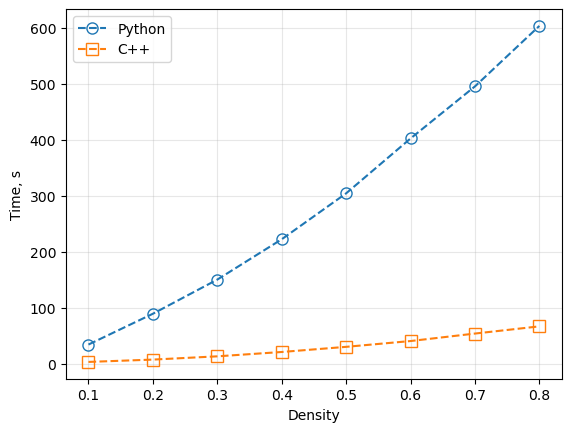

In [50]:
xx = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
t1 = [2.995, 7.1518, 12.9694, 20.742, 29.9223, 40.284, 53.6497, 66.490]
t2 = [34, 89, 150, 222, 304, 402, 495, 603]

plt.plot( xx, t2, "o--", markersize=8, markeredgewidth=1, markerfacecolor="none", label="Python" )
plt.plot( xx, t1, "s--", markersize=8, markeredgewidth=1, markerfacecolor="none", label="C++" )

plt.xlabel("Density")
plt.ylabel("Time, s")

plt.grid(alpha = 0.3)
plt.legend()
plt.show()